https://note.com/noa813/n/ne506f884e467

## Pythonで共起ネットワークを作る方法をご紹介します

    この記事では、Pythonで共起ネットワークを作る方法をご紹介します。
    画像のような、綺麗な共起ネットワークを作ることができます。

    Google Colaboratoryでやっていきます

    作成方法に入る前に、簡単に共起ネットワークについて解説します。



## そもそも「共起」とは
    ひとつの文で一緒に出てくる単語と単語のペアのことをいいます。

    今日は天気が良かったので、自転車で出かけた

    この文には、3つの名詞「今日」「天気」「自転車」がありますが、これらがひとつの文で共起しています。

    今日と天気、天気と自転車、今日と自転車が単語のペアとなります。

    共起するということは、単語と単語の間に何らかの意味があり、その共起が繰り返し現れるということは、重要度が高いと考えられます。

##共起ネットワークとは
    共起する単語のペアをグラフで可視化したものが共起ネットワークです。

    単語をノードと呼ばれる円で表し、単語の出現頻度を円の大きさで表します。つまり、出現頻度が多いほど円が大きくなります。

    また、単語と単語のペアの関係をエッジと呼ばれる線で表し、ペアの出現の多さを線の太さで表します。

    共起ネットワークで単語のつながりをかたまりとして見ることができるので、文章の概観を視覚的に理解することができます。

    それでは実際に、Pythonで作っていきましょう！

## 使用するテキスト

    三菱商事の有価証券報告書（事業等のリスク）を使います。

In [1]:
#長いです。textsという変数に格納します。
texts = "3 【事業等のリスク】1. リスク管理体制当社では、部門・営業グループと各リスクに対応したコーポレート専門部局が連携し、適切なリスク対応が可能な管理体制を整備しています。なお、以下については当連結会計年度末以降提出日までの管理体制に係る変更等を反映しています。リスク項目管掌組織市場リスク事業投資総括部、財務部（為替・株価・金利）信用リスク主計部、三菱商事フィナンシャルサービス(株)カントリーリスクグローバルリスク総括部事業投資リスク事業投資総括部コンプライアンスに関するリスク法務部危機事象発生による人命への被害・事業中断等のリスク総務部（危機管理室）気候変動に関するリスクサステナビリティ部2. 主要なリスクの概要①\u3000世界マクロ経済環境の変化によるリスク世界的な、又は地域的なマクロ経済環境の変化は、個人消費や設備投資と深く関係し、商品市況にも影響を及ぼします。その結果、当社がグローバルかつ多様な産業領域に展開している事業の商品・製品価格、取扱量やコストなどに変動をもたらし、経営成績及び財政状態に大きな影響を及ぼす可能性があります。当連結会計年度においては、ロシア・ウクライナ情勢の影響、資源価格の高止まり、物価上昇といった下押し圧力の中でも、幅広い地域・国において新型コロナウイルス禍からの経済正常化による景気の回復基調は維持されました。今後は、これらの下押し圧力が継続していることに加え、欧米諸国等の金融政策の引き締めの効果が実体経済に伝播していることも踏まえると、世界経済は徐々に減速傾向を強めていくとみられるため、動向を注視しています。②\u3000市場リスク以下「当期純利益」は、「当社の所有者に帰属する当期純利益」を指しています。当期純利益への影響額は、他に記載のない限り当社の当連結会計年度の連結業績を踏まえて試算した、翌連結会計年度に対する影響額を記載しています。a.\u3000商品市況リスク当社では、商取引や資源エネルギーの権益を保有して生産物を販売すること、関係会社の工業製品を製造・販売することなどの活動においてさまざまな商品価格の変動リスクを負っています。特にエネルギー資源及び金属資源の取引においては、売買価格の変動を通じて当社の業績に大きな影響を及ぼします。また、投資の評価においても商品価格が重要なインプットとなる場合があります。とくに事業期間が長期に及ぶ場合、短期的な価格の動向よりも中長期的な価格見通しの方が、投資の評価により重要な影響を与えるため、将来の需給環境等のファンダメンタルズや、社外の金融機関等の提供するデータ等を考慮して、商品ごとに当社としての見通しを策定しています。商品市況の長期的な低迷又は上昇が想定される場合には、保有する有形固定資産や持分法で会計処理される投資などの減損及び減損戻入を通じて、業績に影響を与える可能性があります。当社の重要な投資案件については、「⑤ 事業投資リスク（重要な投資案件）」をご参照ください。（エネルギー資源）当社は北米、東南アジア、豪州などにおいて、天然ガス・石油の開発・生産事業、液化天然ガス（LNG）事業を行っており、天然ガス・原油価格は当社の業績に重要な影響を与えます。原油（Brent）価格は、1月は中国等のアジア諸国における需要の伸びが期待されたこともあり、1バレル当たり80米ドル台で推移したのち、ロシア産原油の減産が3月から開始されることが発表され、2月も80米ドル台を維持しました。3月に入りSilicon Valley Bankの破綻を発端とした世界的な景気後退懸念等により、70米ドル前半まで下落したものの、同銀行破綻の景気影響が限定的との見方等から、3月末には80米ドル近辺まで上昇しました。今後も経済情勢やロシア・ウクライナ情勢の長期化を含む地政学リスクなどによって価格が上下するボラティリティの高い展開が続くと認識しています。また、当社のLNG販売は長期契約が大部分を占めるものの、一部はスポット契約にて販売しています。1月初めのアジアのLNGスポット価格は、百万Btu（英国熱量単位）当たり約20米ドルと高値で開始しました。アジアのLNGスポット価格は欧州ガス価格と一定程度連動していますが、欧州ガス価格は暖冬や産業用を中心としたガス需要の減少、LNG輸入増等により目標以上のガス在庫水準が維持されたことにより下落を続け、アジアのLNGスポット価格も3月末時点で12米ドル台まで下落しています。LNG価格は多くが原油価格にリンクしており、1バレル当たりの原油価格が1米ドル変動すると、当社の当期純利益は主に持分法による投資損益を通じて年間約15億円増減すると試算されます。ただし、LNG・原油の価格変動が当社の業績に影響を及ぼすまでにはタイムラグがあるため、価格変動が直ちに業績に反映されるとは限りません。なお、前連結会計年度における原油価格1米ドルの変動当たりの当期純利益影響額（年間約25億円）との差額は、影響額の算定対象の変更によるものです。その他の投資からの受取配当金は、投資先の配当性向や配当決議時期等の影響を受け、原油価格の変動に伴う直接的な影響は現時点では限定的なことから、当連結会計年度末より当期純利益に対する影響額の算定対象から除外しています。（金属資源）当社は、100%出資子会社の三菱デベロップメント社（MITSUBISHI DEVELOPMENT PTY LTD、本社：豪州ブリスベン、以下「MDP社」）を通じて、製鉄用の原料炭を販売しており、石炭価格の変動はMDP社の収益を通じて当社の業績に影響を与えます。また、MDP社の収益は、石炭価格の変動の他にも、豪ドル・米ドル・円の為替レートの変動や悪天候、労働争議等の要因にも影響を受けます。銅についても、生産者としての価格変動リスクを負っています。1トン当たりの価格が100米ドル変動すると当期純利益で年間29億円の変動をもたらす（1ポンド当たりの価格が0.1米ドル変動すると当期純利益で年間64億円の変動をもたらす）と試算されますが、粗鉱品位、生産・操業状況、再投資計画（設備投資）等、価格変動以外の要素からも影響を受けるため、銅の価格のみで単純に業績への影響額が算出されない場合があります。b.\u3000為替リスク当社は、輸出入、及び外国間などの貿易取引において外貨建ての決済を行うことに伴い、円に対する外国通貨レートの変動リスクを負っています。これらの取引では必要に応じて、先物為替予約などによるヘッジ策を講じていますが、それによって完全に為替リスクが回避される保証はありません。また、当社の海外事業に対する投資については、為替変動により、外貨建の受取配当金や海外連結子会社・持分法適用会社の持分損益の円貨換算額が増減するリスクが存在し、外国通貨に対して円高が進むと当期純利益にマイナスのインパクトを与えます。米ドル・円のレートが1円変動すると、当社の当期純利益は年間約50億円増減すると試算されます。加えて、在外営業活動体の換算差額を通じて自己資本が増減するリスクが存在するため、一部の大口の投資については主に先物為替予約を用いたヘッジ策を講じています。c.\u3000株価リスク当社は、当連結会計年度末時点で、取引先や関連会社を中心に1兆1,076億円（時価）の市場性のある株式を保有しており、株価変動のリスクを負っています。上記の価格は1,495億円の評価益を含んでいますが、株式の動向次第で評価益は減少するリスクがあります。また、当社の企業年金では、年金資産の一部を市場性のある株式により運用しています。よって、株価の下落は年金資産を目減りさせるリスクがあります。d.\u3000金利リスク当社の当連結会計年度末時点の有利子負債総額（リース負債除く）は4兆8,899億円であり、一部を除いて変動金利となっているため、金利が上昇する局面では利息負担が増加するというリスクがあります。しかし、この有利子負債の相当部分は金利の変動により影響を受ける営業債権・貸付金等と見合っており、金利が上昇した場合に、これらの資産から得られる収益も増加するため、金利の変動リスクは、タイムラグはあるものの、相殺されることになります。また、純粋に金利の変動リスクにさらされている部分についても、見合いの資産となっている投資有価証券や固定資産からもたらされる取引利益、配当金などの収益は景気変動と相関性が高いため、景気回復の局面において金利が上昇し支払利息が増加しても、見合いの資産から得られる収益も増加し、結果として影響が相殺される可能性が高いと考えられます。ただし、金利の上昇が急である場合には、利息負担が先行して増加し、その影響を見合いの資産からの収益増加で相殺しきれず、当社の業績は一時的にマイナスの影響を受ける可能性があります。このような金利などの市場動向を注視し、機動的に市場リスク対応を行う体制を固めるため、当社ではALM（Asset Liability Management）委員会を設置し、資金調達政策の立案や金利変動リスクの管理を行っています。③\u3000信用リスク当社は、様々な営業取引を行うことによって、売掛金、前渡金などの取引与信、融資、保証及び出資などの形で取引先に対して信用供与を行っており、取引先の信用悪化や経営破綻等による損失が発生する信用リスクを負っています。また、当社は主としてヘッジ目的のためにスワップ、オプション、先物などのデリバティブ取引を行っており、デリバティブ取引の契約先に対する信用リスクを負っています。当社では当該リスクを管理するために、取引先ごとに成約限度額・信用限度額を定めると同時に、社内格付制度を導入し、社内格付と与信額により定めた社内規程に基づき、与信先の信用状態に応じて必要な担保・保証などの取付けを行っていますが、信用リスクが完全に回避される保証はありません。取引先の信用状態悪化に対しては取引縮小や債権保全策を講じ、取引先の破綻に対しては処理方針を立てて債権回収に努めていますが、債権等が回収不能になった場合には当社の業績は影響を受ける可能性があります。④\u3000カントリーリスク当社は、海外の会社との取引や出資において、国の政治・経済・社会情勢に起因した、代金回収や事業遂行の遅延・不能等が発生するカントリーリスクを負っています。当社においては、国ごとのリスク状況の把握、カントリーリスク対策制度の立案・管理をコーポレート担当役員（CRO）を委員長とする地域戦略委員会で行っています。カントリーリスク対策制度では、各種リスク要因を踏まえ各国を区分の上、区分ごとに枠を設定する等の手法でカントリーリスクを一定範囲内にコントロールしています。また、個別案件のカントリーリスクについては、保険を付保するなど、案件の状況に応じて適切なリスクヘッジ策を講じています。ロシア、ウクライナ両国宛てリスクについても、同制度を通じて管理しています。しかしながら、上記のようなリスクヘッジ策を講じていても、当社の取引先や出資先若しくは進行中のプロジェクト所在国の政治・経済・社会情勢の悪化によるリスクを完全に回避することは困難です。そのような事態が発生した場合、当社の業績は影響を受ける可能性があります。なお、ロシア・ウクライナ情勢の影響については、第5 経理の状況 連結財務諸表注記2 「（5）重要な会計上の判断、見積り及び仮定」をご参照ください。⑤\u3000事業投資リスク当社は、株式・持分を取得して当該企業の経営に参画し、商権の拡大やキャピタル・ゲイン獲得などを目指す事業投資活動を行っていますが、この事業投資に関連して投下資金の回収不能、撤退の場合に追加損失が発生するリスク、及び計画した利益が上がらないなどのリスクを負っています。事業投資リスクの管理については、新規の事業投資を行う場合には、投資の意義・目的を明確にした上で、投資のリスクを定量的に把握し、事業特性を踏まえて決定した投下資金に対する利回りが、期待収益率を上回っているか否かを評価し、選別を行っています。投資実行後は、事業投資先ごとに、毎年定期的に「経営計画書」を策定しており、投資目的の確実な達成のための管理を行う一方、計画した収益を上げていない先については、持分売却・清算による撤退を含め、保有方針を明確にすることで、効率的な資産の入替を行っています。このような投資評価の段階での案件の選別、投資実行後の管理を厳格に行っていますが、期待する利益が上がらないというリスクを完全に回避することは困難であり、事業環境の変化や案件からの撤退等に伴い、当社の業績は影響を受ける可能性があります。なお、事業投資に含まれる商品市況リスクについては、「② a. 商品市況リスク」をご参照ください。（重要な投資案件）a.\u3000豪州原料炭及びその他の金属資源権益への投資当社は、1968年11月にMDP社を設立し、炭鉱開発（製鉄用の原料炭）に取り組んできました。2001年には、MDP社を通じ、約1,000億円で豪州クイーンズランド州BMA原料炭事業（以下「BMA」）の50%権益を取得し、パートナーのBHP社（BHP Group Limited、本社：豪州メルボルン）と共に事業を運営しています。現在では、BMAは年間6,500万トンの生産量を誇る世界最大規模の原料炭事業に成長しています。また、当連結会計年度末のMDP社の固定資産帳簿価額は9,946億円となっています。b.\u3000チリ銅資産権益への投資当社は、アングロ・アメリカン社（Anglo American Plc、本社：英国ロンドン、以下「アングロ社」）、チリ国営の銅生産会社であるCorporación Nacional del Cobre de Chile社（本社：チリ国サンチャゴ）と三井物産株式会社の合弁会社（以下「合弁会社」）と共に、チリ国銅資源権益保有会社アングロ・アメリカン・スール社（Anglo American Sur S.A.、本社：チリ国サンチャゴ、以下「アングロスール社」）の株式を保有しています。アングロスール社への出資比率は、アングロ社グループが50.1%、合弁会社が29.5%、当社グループが20.4%となっており、当社の取得額は45.1億米ドルです。同社は、チリ国内にロスブロンセス銅鉱山、エルソルダド銅鉱山、チャグレス銅製錬所、並びに大型の未開発鉱区等の資産を保有しています（同社合計の2022年銅生産量実績は約31万トン）。当社はアングロスール社への投資に対して持分法を適用しています。同社宛ての投資に関しては、持分法で会計処理される投資として減損の兆候判定を行っています。同社の生産・開発計画は長期間に及び、短期的な価格動向よりも中長期的な価格見通しの方が、投資評価により重要な影響を与えるため、最新の銅価見通しや開発計画を含め、中長期的な観点から評価し判断しています。当連結会計年度において、2022年5月の環境許認可却下を踏まえ総合的に精査を進めた結果、371億円の減損損失を「持分法による投資損益」を通じて計上し、当連結会計年度末の帳簿価額は1,449億円となっています。なお、再審査の結果、2023年4月にチリ国環境評価局（SEA）から申請内容についての承認を取得済みです。詳細については、第5 経理の状況 連結財務諸表注記38をご参照ください。c.\u3000ペルー銅資産権益への投資当社は、アングロ社と共同で、ペルー共和国ケジャベコ銅鉱山プロジェクト（以下「ケジャベコ」）の権益保有会社であるアングロ・アメリカン・ケジャベコ社（Anglo American Quellaveco S.A.、本社：ペルー共和国リマ、以下AAQ社）の権益40%を保有しています。ケジャベコは約8.9百万トン（銅分換算）の埋蔵量を見込む大規模鉱山で、高いコスト競争力を有しています。2018年より開発に向けた建設を開始し、2022年に銅精鉱の生産を開始しました。当社の持分銅生産量は現在20万トン超/年と本邦最大規模ですが、本鉱山の本格的な立上げ後、更に32～37万トン程度/年となる見込みです。当社はAAQ社への投資に対して持分法を適用しています。AAQ社宛ての投資に関しては、持分法で会計処理される投資として減損の兆候判定を行っています。ケジャベコの生産計画は長期間に及び、短期的な価格動向よりも中長期的な価格見通しの方が、投資評価により重要な影響を与えるため、最新の銅価見通しや開発計画を含め、中長期的な観点から評価し判断しています。当連結会計年度末時点のAAQ社に関する投資簿価と融資額の合計は4,924億円となっています。d.\u3000モントニー・シェールガス開発プロジェクト/LNGカナダプロジェクト当社は、カナダにおいて上流資源開発からLNGの生産・輸出販売に至る天然ガスバリューチェーンを構築しています。上流事業として、パートナーのOvintiv社と共に、当社100%出資子会社のCUTBANK DAWSON GAS RESOURCES LTD.社を通じてシェールガスの開発事業を行っています。当社グループの権益保有比率は40%で、当連結会計年度末の「持分法で会計処理される投資」の帳簿価額は2,251億円となっています。また、生産された天然ガスの一部をLNGとして輸出販売するため、事業パートナーと共に2018年にLNGカナダプロジェクトの最終投資決定をしました。同プロジェクトは、年間1,400万トンの生産能力を持つ天然ガス液化設備を建設し、日本など東アジアの需要国向けにLNGを輸出販売する事業で、2020年代中ごろの生産開始を予定しています。当社は子会社のDiamond LNG Canada Partnershipを通じて参画しており、パートナーであるShell社、Petronas社、PetroChina社、韓国ガス公社と共に同プロジェクトを推進しています。当連結会計年度末のDiamond LNG Canada Partnershipの固定資産帳簿価額は2,813億円となっています。e.\u3000ローソンへの出資当社は、2017年に株式会社ローソン（以下「ローソン社」）の発行済株式数の16.6%を株式公開買付により取得し、それまで保有していた33.4%と併せて、発行済株式の過半数を保有することとなり、同社を連結子会社としました。ローソン社は、コンビニエンスストア「ローソン」のフランチャイズシステム及び直営店舗の運営を行うとともに、海外コンビニエンス事業及びそれ以外の周辺事業を運営しています。ローソン社の店舗網は、2023年2月末時点で、日本全国に約14,600店、海外に約6,100店の合計約20,700店の規模になっています。事業環境が悪化した場合には、ローソン社の業績や、のれんの減損などを通じて当社の業績に影響を与える可能性があります。当連結会計年度末の「のれん」の帳簿価額は1,618億円（持分比率勘案前）となっています。詳細については、第5 経理の状況 連結財務諸表注記14をご参照ください。f.\u3000Enecoへの投資当社は、2020年3月に、中部電力株式会社と共同で設立したDiamond Chubu Europe B.V.を通じて、欧州で総合エネルギー事業を展開するN.V. Eneco（以下「Eneco」）の100%の株式を約5,000億円で取得しました。Enecoは、再生可能エネルギー（以下「再エネ」）開発・供給事業、トレーディング事業、小売・新サービス事業それぞれの事業分野で高い競争力・適応力を有する総合エネルギー事業会社です。当社は、Enecoの再エネに関する技術力・ノウハウを活用し、欧州及び欧州外で再エネ開発を加速させ、経済価値、社会価値、環境価値の三価値同時実現に資する取り組みを強化する方針です。電力需要や欧州マクロ経済が低迷する場合には、Enecoの業績や、取得時に認識したのれんの減損などを通じて当社の業績に影響を与える可能性があります。当連結会計年度末の「のれん」の帳簿価額は1,247億円（持分比率勘案前）となっています。詳細については、第5 経理の状況 連結財務諸表注記14をご参照ください。⑥\u3000コンプライアンスに関するリスク当社は、国内外で多くの拠点を持ち、あらゆる産業を事業領域としてビジネスを展開していることから、関連する法令・規制は多岐にわたっています。具体的には日本の会社法、税法、金融商品取引法、独占禁止法、贈収賄関連諸法、安全保障貿易管理等貿易関連及び制裁関連諸法、環境関連諸法や各種業法を遵守する必要があり、また海外で事業を展開する上では、それぞれの国・地域での法令・規制に従う必要があります。とくに、足元ではロシア・ウクライナ情勢に起因する各国経済制裁が導入・強化されていますが、当社はその動向を適時にフォローし、チーフ・コンプライアンス・オフィサーを当社最高責任者として、適切な対応を行っています。当社はコンプライアンス委員会を設け、その委員会を統括するチーフ・コンプライアンス・オフィサーが連結ベースでの法令・規制遵守を指揮・監督しています。その指揮・監督の下、各営業グループ・部門のコンプライアンス・オフィサーが、固有のコンプライアンス施策の立案・実施をするなど、コンプライアンス意識を高めることに努めています。また、当社は、子会社及び関連会社（上場会社は除く）に対して、当社と同等の水準で各社に適したコンプライアンス管理体制を構築させ、又はさせるように努めています。しかしながら、このような施策を講じてもコンプライアンス上のリスクは完全に回避できない可能性があり、関連する法令・規制上の義務を実行できない場合には、当社の業績は影響を受ける可能性があります。⑦\u3000危機事象発生による人命への被害・事業中断等のリスク地震、大雨、洪水などの自然災害・異常気象や、新型インフルエンザ・新型コロナウイルス等の新興感染症、大規模事故、テロ・暴動、東アジア・欧州等における地政学的要因による有事発生、その他国内外における危機的な事象が発生した場合、当社の社員・事業所・設備やシステムなどに対する被害が発生し、営業・生産活動に支障が生じる可能性があります。当社では、緊急危機対策本部を設置し、危機発生時における当社関係者の安全確保・安否確認等の初動対応、重要業務の事業継続計画（BCP）の整備、建物・設備・システム等の耐震対策（データ等のバックアップを含む）、定期訓練、必要物資の備蓄等の各種対策を講じています。また、あらゆる事象を想定したリスク・影響度分析に基づく初動対応・事業継続計画（BCP）の策定、継続的なPDCAサイクルの実施等の包括的なマネジメント活動である事業継続マネジメント（BCM）を推進し、各種危機に備えています。新型コロナウイルス感染症への対応に関しては、産業医を加えた緊急危機対策本部を中心に、「社員の感染予防・感染拡大防止」と「適切な事業継続」の観点から、必要な措置を迅速に実行しています。国内・海外ともに、社員の安全を最優先としつつ、感染状況や日本政府・各自治体の要請、及び各国の情勢や規制に応じ、感染対策の徹底を図るとともに、都度必要な措置を実行し、安全状況を十分に確認した上で、適切な事業継続を図っていきます。しかし、全ての被害や影響を回避できるとは限らず、かかる事象の発生時には当社の業績は影響を受ける可能性があります。⑧\u3000気候変動に関するリスク「2 サステナビリティに関する考え方及び取組」の「2. リスク管理」に記載しています。"

## ライブラリーのインストール
    形態素解析のライブラリーはGINZAを使います

In [2]:
!pip install SudachiPy==0.5.4 ginza==4.0.6 ja-ginza==4.0.0
!pip install japanize-matplotlib
!pip install pyvis

    これらのコマンドはPythonのパッケージをインストールするためのものです。
    各パッケージの目的を簡単に説明します。

    SudachiPy==0.5.4: SudachiPyは形態素解析エンジンで、日本語のテキストを形態素（単語や助詞などの基本的な言語要素）に分割します。
    バージョン0.5.4がインストールされます。

    ginza==4.0.6: Ginzaは、spaCyのための日本語向け自然言語処理ツールキットです。
    バージョン4.0.6がインストールされます。

    ja-ginza==4.0.0: ja-ginzaは、Ginzaのモデルデータ（学習済みのモデルや辞書）を提供します。バージョン4.0.0がインストールされます。

    japanize-matplotlib: これはMatplotlibというグラフ描画ライブラリを日本語化するためのパッケージです。
    Matplotlibで日本語のラベルやタイトルを利用するときに便利です。

    pyvis: Pyvisは、対話的なネットワーク可視化を行うためのライブラリです。
    ネットワークグラフを描画し、対話的に探索できるようにします。

    これらのパッケージをインストールすることで、日本語テキストの形態素解析、
    日本語のグラフ描画、対話的なネットワーク可視化などが可能になります。

    GINZAをGoogleコラボで動かすためのおまじないです

In [3]:
import pkg_resources, imp
imp.reload(pkg_resources)

<module 'pkg_resources' from '/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py'>

    このコードは pkg_resources モジュールをリロードしているようですが、通常、Pythonの標準ライブラリやサードパーティのモジュールをリロードする必要はありません。
    通常、モジュールは一度ロードされたら、その後の変更は反映されません。

    pkg_resources は、setuptools パッケージに含まれており、パッケージのリソース（例: ファイルや画像）にアクセスするための機能を提供します。
    モジュールをリロードすることが目的であれば、通常、Pythonの importlib モジュールを使用します。
    ただし、モジュールのリロードは注意が必要で、正しく処理しないと意図しない動作を引き起こす可能性があります。

    リロードが本当に必要な場合、以下のように importlib を使用できます。

    import importlib
    import pkg_resources
    importlib.reload(pkg_resources)

    ただし、通常はこれが必要ない場面がほとんどであり、
    コードの一貫性を維持するためにはモジュールの再起動が良いアプローチとなることがあります。







## ライブラリーのインポート

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import re
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import japanize_matplotlib
from matplotlib.pyplot import figure, text
from networkx.algorithms.community import greedy_modularity_communities
import unicodedata

import spacy
nlp = spacy.load('ja_ginza')

    このコードは、いくつかのPythonモジュールやライブラリをインポートしています。
    それぞれのモジュールの役割について簡単に説明します。

    sklearn.feature_extraction.text.CountVectorizer: テキストデータから単語の出現頻度ベクトルを作成するためのツール。
    テキストをトークン化し、単語の出現回数を数えてベクトルとして表現します。
    re: 正規表現モジュール。文字列のパターンマッチングや置換など、テキスト処理において柔軟なパターン操作が可能です。
    networkx: グラフ理論のためのライブラリ。ネットワークやグラフ構造の作成、操作、可視化などが可能です。
    pyvis.network.Network: インタラクティブなネットワーク可視化のためのライブラリ。NetworkXと連携して使われることがあります。
    matplotlib.cm: カラーマップ関連の機能を提供するmatplotlibモジュール。
    japanize_matplotlib: Matplotlibの日本語表示をサポートするためのライブラリ。
    spacy: 自然言語処理ライブラリ。ここでは日本語のトークン化や品詞タグ付けを行うために「ja_ginza」というモデルを使用しています。

    これらのモジュールやライブラリは、データ処理、解析、可視化、自然言語処理など、様々なタスクに利用されます。


## 関数の作成
    ここから関数が続きます。実行はまとめて行います。

### テキストを正規化・クリーニングする関数

In [5]:
def preprocess_texts(text):

    replaced_text = unicodedata.normalize("NFKC",text)
    replaced_text = replaced_text.upper()
    replaced_text = re.sub(r'[【】 () （） 『』　「」]', '' ,replaced_text) #【】 () 「」　『』の除去
    replaced_text = re.sub(r'[\[\]［］]', ' ', replaced_text)
    replaced_text = re.sub(r'[@＠]\w+', '', replaced_text)  # メンションの除去
    replaced_text = re.sub(r'\d+\.*\d*', '', replaced_text) #数字を0にする

    return replaced_text

    このpreprocess_texts関数は、テキストの前処理を行う関数のようです。
    入力テキストをクリーンアップし、変換するための操作が含まれています。
    以下に、この関数が行う操作を具体的に説明します：

    unicodedata.normalize("NFKC", text): テキストをUnicode正規化形式互換合成（NFKC）に正規化します。これにより、文字の表現が標準化されます。

    NFKC は Unicode の正規化形式の一つで、"Normalization Form Compatibility Composition"（互換合成正規化形式）を指します。
    Unicode 正規化は、同じ意味を持つ異なる Unicode 文字表現を標準化するためのプロセスです。

    NFKC は、互換性を考慮し、合成を行う正規化形式です。
    合成とは、濁点や半濁点が結合したり、特定の文字が統合されたりすることを指します。
    例えば、半角と全角の混在や、異なる形式で表される同じ文字を統一するために使われます。
    unicodedata.normalize("NFKC", text) は、与えられたテキストを NFKC 形式に正規化するための Python の標準ライブラリである unicodedata モジュールの関数です。
    この処理は、Unicode 文字列の表現をより統一された形に変換するのに役立ちます。

    text.upper(): テキストを大文字に変換します。これはテキストの大文字化を標準化するために役立ちます。
    re.sub(r'[【】 () （） 『』　「」]', '' ,replaced_text): 正規表現を使用して、特定の文字（括弧、カッコ、引用符など）を削除します。
    re.sub(r'[\[\]［］]', ' ', replaced_text): 角括弧をスペースに置換します。
    re.sub(r'[@＠]\w+', '', replaced_text): メンションやユーザー参照を削除します。メンションは'@'記号の後に続く英数字です。
    re.sub(r'\d+\.*\d*', '', replaced_text): 数字（小数を含む）を空の文字列に置換します。

    要するに、この関数はテキストをクリーンアップし、前処理することを目的としており、特定の文字を削除し、テキストを標準化し、大文字化します。
    これはテキストデータをさらなる分析やモデリングのために準備するためによく使われる一連の操作です。

## テキストの中で指定した品詞だけを抽出する関数
    例えば、名詞だけとか、名詞＋動詞だけとか、指定して抽出します

In [6]:
def extract_words(sent, pos_tags):
    words = [token.lemma_ for token in sent
             if token.pos_ in pos_tags and token.lemma_ ]
    return words

    この Python 関数は、spaCy ライブラリを使用して文から単語を抽出するためのものです。
    関数の名前は extract_words で、以下の引数を持っています：

    sent: spaCy の文オブジェクト（Doc オブジェクト）で、解析された文章を表します。
    pos_tags: 抽出する単語の品詞タグのリストです。
    例えば、動詞を抽出したい場合は、pos_tags=['VERB'] などと指定します。

    関数内で、文 (sent) の各トークンに対して以下の条件を満たすトークンの基本形（lemma）を抽出し、そのリストを返します：

    ・トークンの品詞が pos_tags に含まれている。
    ・トークンの基本形が空文字列でない。

    こうすることで、指定された品詞に該当する単語の基本形をリストとして取得できます。

    [token.lemma_ for token in sent if token.pos_ in pos_tags and token.lemma_ ]
    ここでは、文 (sent) 内の各トークンに対して、条件式 token.pos_ in pos_tags and token.lemma_ を満たすかどうかを確認しています。
    条件が真の場合、トークンの基本形 (token.lemma_) がリストに追加されます。
    このような条件を満たすトークンだけが最終的なリストに含まれることになります。
    条件が False の場合、リスト内包表記ではそのトークンがリストに加えられないため、最終的な結果のリストに含まれません。
    条件が True の場合にのみ、トークンがリストに追加されます。

## 共起行列を作成する関数

In [7]:
def count_cooccurrence(sents, token_length='{2,}'):
    token_pattern=f'\\b\\w{token_length}\\b'
    count_model = CountVectorizer(token_pattern=token_pattern)

    X = count_model.fit_transform(sents)
    words = count_model.get_feature_names_out()
    word_counts = np.asarray(X.sum(axis=0)).reshape(-1)

    X[X > 0] = 1
    Xc = (X.T * X)
    return words, word_counts, Xc, X

    この関数は、与えられた文章リスト (sents) から共起行列を生成するためのものです。
    以下、主な機能の説明です:

    token_pattern は、トークンとみなす単語のパターンを指定しています。
    \\b\\w{token_length}\\b は、単語の長さが {2,}（2文字以上）であるものをトークンとして抽出する正規表現パターンです。

    CountVectorizer は、文書集合からトークンの出現回数を数えるためのツールです。
    ここでは、単語の出現回数を数えるのではなく、その単語が存在するか否かを二値で表すベクトル（0または1の行列）を生成します。

    X は文章をベクトル化した行列です。各行が文章、各列が単語に対応しています。

    words：count_model から取得された特徴量（単語）のリストです。

    word_counts：各単語の総出現回数を示す配列です。X.sum(axis=0) で各単語の列ごとの合計を計算し、それをNumPyの配列に変換しています。

    X[X > 0] = 1：X 行列の各要素が0より大きい場合、それを1に置き換えます。これにより、単語の出現回数が0以上であれば1、そうでなければ0となるベクトル化された文章行列が得られます。

    Xc = (X.T * X)：X 行列の転置行列と元の行列の積を取り、共起行列 Xc を得ます。
    この行列は単語の共起情報を示しており、各要素 Xc[i, j] は単語 i と単語 j の同時出現回数を示します。

    最終的に、words、word_counts、Xc、および変換後のベクトル化された文章 X が関数の出力として返されます。

In [8]:
def word_weights(words, word_counts):
    count_max = word_counts.max()
    weights = [(word, {'weight': count / count_max})
               for word, count in zip(words, word_counts)]
    return weights

    このコードでは、各単語に対して重みを計算しています。
    具体的な処理は以下の通りです：

    count_max = word_counts.max()：word_counts 配列の中で最大の出現回数 count_max を求めます。

    weights = [(word, {'weight': count / count_max}) for word, count in zip(words, word_counts)]：
    各単語とその出現回数に対して、重みを計算し、(単語, {'weight': 重み}) の形式でタプルを生成します。
    重みはその単語の出現回数を count_max で割ったものです。

    zip(words, word_counts) は、words と word_counts という2つのリスト（またはイテラブルなオブジェクト）を
    同時に反復処理するための組み込み関数 zip を利用しています。

    zip関数を使うことで、words リストと word_counts リストの対応する要素同士がペアになります。
    例えば、words が ['apple', 'banana', 'orange'] であり、word_counts が [10, 5, 8] であれば、zip(words, word_counts) は以下のようなイテレータを生成します：
    [('apple', 10), ('banana', 5), ('orange', 8)]
    このイテレータは for ループで反復処理することができ、各単語とその出現回数をペアで取得できます。
    この場合、各要素は ('単語', 出現回数) の形式になります

    この関数の結果として、各単語とその重みがリストとして得られます。
    これは、ネットワークの可視化などで単語の重要度を考慮するために使用できます。

    単語の重みを計算する主な目的は、共起行列やグラフの構築において、単語の出現頻度に基づいて重みを与えることで、
    単語の重要性を考慮した分析を行うことです。一般的な理由としては次のようなものがあります：

    単語の出現頻度の差異を考慮する: 出現頻度の高い単語は、単なる出現回数だけではなく、テキスト全体での重要性を示している可能性があります。
    したがって、出現頻度に基づく重み付けを行うことで、より重要な単語により大きな重みを与えることができます。

    共起行列やグラフのスパース性を低減する: 共起行列や単語の関係を表すグラフは通常スパースな構造を持っています。
    高頻度で出現する単語に大きな重みを与えることで、より密なグラフを構築し、解析の効率を向上させることができます。

    特定のタスクにおいて性能向上: 重み付けされた単語を用いた解析は、情報検索、文書分類、クラスタリングなどの自然言語処理のタスクにおいて、
    通常、良い性能を発揮します。これは、文脈において重要な単語に焦点を当てることができるためです。

    総じて、単語の重みを計算することで、より意味のある分析が可能になり、
    テキストデータの構造や意味をより適切に捉えることが期待されます。

In [9]:
def cooccurrence_weights(words, Xc, weight_cutoff):
    Xc_max = Xc.max()
    cutoff = weight_cutoff * Xc_max
    weights = [(words[i], words[j], Xc[i,j] / Xc_max)
               for i, j in zip(*Xc.nonzero()) if i < j and Xc[i,j] > cutoff]
    return weights

    このコードは、共起行列から得られる単語の共起関係の重みを計算するための関数です。以下に各部分の説明を行います：

    Xc_maxの計算:
    Xc_max = Xc.max()
    共起行列 Xc の最大値を Xc_max として取得しています。

    cutoffの計算:
    cutoff = weight_cutoff * Xc_max
    weight_cutoff は共起関係の重みのカットオフ値です。これを使って、Xc_max に基づいてカットオフ値 cutoff を計算しています。

    weightsの生成:このコードは、単語の共起関係の重みを抽出しています。
    以下に各部分の説明をします：

    (words[i], words[j], Xc[i,j] / Xc_max):
    words リストから単語のペア (i, j) とその共起行列のセルの値 Xc[i, j] を抽出しています。
    また、その値を Xc_max で割って正規化しています。

    for i, j in zip(*Xc.nonzero()) if i < j and Xc[i,j] > cutoff::
    共起行列 Xc の非ゼロの要素 (i, j) に対して、i < j かつ Xc[i, j] が cutoff を超える場合に処理を行います。これは、対称行列である共起行列の上三角行列の要素だけを処理するための条件です。

    このコードによって、共起行列の特定の閾値を超える単語の共起関係の重みを抽出し、それをリスト weights に格納しています。

    *はアンパック演算子と呼ばれ、リストやタプルなどの要素を展開して関数の引数に渡す役割を果たします。
    zip(*Xc.nonzero()) では、Xc.nonzero() の結果である2つのNumPy配列（行のインデックスと列のインデックス）を zip 関数に渡すために使われています。

    例えば、以下のような共起行列 Xc があるとします：
    Xc = array([[0, 1, 2, 0],
                [1, 0, 3, 0],
                [2, 3, 0, 4],
                [0, 0, 4, 0]])
    Xc.nonzero() の結果は (array([0, 0, 1, 1, 2, 2, 2, 3]), array([1, 2, 0, 2, 0, 1, 3, 2])) です。
    (nonzero() メソッドは、非ゼロの要素の行と列のインデックスを取得します。)
    
    これを zip(*Xc.nonzero()) に渡すと、次のように展開されます：
    zip(*Xc.nonzero()) -> zip(array([0, 0, 1, 1, 2, 2, 2, 3]), array([1, 2, 0, 2, 0, 1, 3, 2]))

    # 展開された結果
    (0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 3), (3, 2)

    このように、zip(*Xc.nonzero()) によって、行のインデックスと列のインデックスを対応するペアとして取得できます。

    nonzero() メソッドは、非ゼロの要素の行と列のインデックスを取得します。

    この関数は、単語の共起関係の中で特定の重み以上のものだけを取り出すことができるようになっています。
    weight_cutoff を変更することで、異なる重みの閾値を試すことができます。

## 共起ネットワークを設定する関数
    ネットワークの基本的なレイアウト、タイプや、ノード・エッジの色、大きさ、フォントなどを設定します。
    レイアウトやノードの大きさなどは、後で、UIを使って可変できる設定にしています。

    ノードの色は、このコードの太字の部分を変えてください。
    matplotlibのカラーマップを指定できます。

colors_array = cm.**Pastel1**(np.linspace(0.1, 0.9, len(colors_list)))

In [10]:
def create_network(words, word_counts, Xc, weight_cutoff):
    G = nx.Graph()

    weights_w = word_weights(words, word_counts)
    G.add_nodes_from(weights_w)

    weights_c = cooccurrence_weights(words, Xc, weight_cutoff)
    G.add_weighted_edges_from(weights_c)

    G.remove_nodes_from(list(nx.isolates(G)))
    return G

    この関数は、共起ネットワーク（co-occurrence network）を作成するためのものです。具体的な処理を解説します。

    G = nx.Graph():無向グラフ G を作成します。
    weights_w = word_weights(words, word_counts):word_weights 関数を用いて、単語の出現回数に基づくノードの重みを計算します。
    weights_w は各単語をノードとし、その重みを持ったリストです。

    G.add_nodes_from(weights_w):weights_w に含まれるノードと重みを無向グラフ G に追加します。

    weights_c = cooccurrence_weights(words, Xc, weight_cutoff):cooccurrence_weights 関数を用いて、共起関係に基づくエッジの重みを計算します。
    weights_c は各エッジとその重みを持ったリストです。

    G.add_weighted_edges_from(weights_c):weights_c に含まれるエッジと重みを無向グラフ G に追加します。

    G.remove_nodes_from(list(nx.isolates(G))):孤立したノード（他のノードと結ばれていないノード）を削除します。

    return G:最終的な共起ネットワーク G を返します。
    
    この関数により、単語の出現回数と共起関係に基づく重みを考慮して共起ネットワークが構築されます。

In [11]:
def pyplot_network(G):
    plt.figure(figsize=(25, 10),dpi=300)
    if layout == 'spring':
      pos = nx.spring_layout(G, k=layout_parameter_k,iterations=50, threshold=0.0001, weight='weight', scale=1, center=None, dim=2, seed=123)

    elif layout == 'fruchterman_reingold':
      pos = nx.fruchterman_reingold_layout(G, dim=2, k=layout_parameter_k, pos=None, fixed=None, iterations=50, weight='weight', scale=1.0, center=None)

    elif layout == 'kamada_kawai':
      pos = nx.kamada_kawai_layout(G, dist=None, pos=None, weight=1, scale=1, center=None, dim=2)

    else:
      pos = nx.random_layout(G, center=None, dim=2, seed=None)

    connecteds = []
    colors_list = []

    for i, c in enumerate(greedy_modularity_communities(G)):
        connecteds.append(c)
        colors_list.append(1/20 * i)

    # ノードの色をカラーマップを使用して変更
    colors_array = cm.Pastel1(np.linspace(0.1, 0.9, len(colors_list)))

    node_colors = []
    for node in G.nodes():
        for i, c in enumerate(connecteds):
            if node in c:
                node_colors.append(colors_array[i])
                break

    weights_n = np.array(list(nx.get_node_attributes(G, 'weight').values()))
    nx.draw_networkx_nodes(G, pos, alpha=0.5,node_color=node_colors,node_size=7000 * weights_n) # alpha = 0.5

    weights_e = np.array(list(nx.get_edge_attributes(G, 'weight').values()))
    nx.draw_networkx_edges(G, pos, edge_color="whitesmoke", width=20 * weights_e) # alpha = 0.5

    nx.draw_networkx_labels(G, pos, font_family='IPAexGothic')

    plt.axis("off")
    plt.show()

    ネットワークの可視化では、ノードの配置が重要で、異なるレイアウトアルゴリズムを選択することがあります。
    以下はそれぞれのレイアウトに関する説明です。

    spring_layout: Fruchterman-Reingoldアルゴリズムに基づくばねモデル。
    ノード同士の反発と引力により、ばねのようなモデルで配置されます。
    kはばねの強さを調整するパラメータです。

    fruchterman_reingold_layout: Fruchterman-Reingoldアルゴリズム。
    ノード同士の反発と引力に基づいて配置されます。
    kは反発の強さを、iterationsはイテレーションの回数を指定します。

    kamada_kawai_layout: Kamada-Kawaiアルゴリズム。
    ノード同士の距離を最適化して配置します。
    distは距離行列を指定し、weightはエッジの重みを考慮するかどうかを指定します。

    random_layout: ランダムにノードを配置します。
    dimは次元数を、seedは乱数生成のシードを指定します。

    これにより、異なる条件や要件に応じて適切なネットワークの配置を選択できます。

    ノードをコミュニティ（クラスター）に分割し、それぞれのコミュニティに異なる色を割り当てるための処理です。以下は各変数の役割です。

    connecteds: 各コミュニティのノードを格納するリストです。
    greedy_modularity_communities(G)は、Gのネットワークをモジュラリティに基づいて分割し、各コミュニティを返します。
    このリストに各コミュニティのノード集合が格納されます。

    enumerateは、反復可能なオブジェクト（リスト、タプル、文字列など）を与えられたインデックスと一緒に反復処理するための組み込み関数です。
    具体的には、enumerateは各要素とその要素のインデックス（通常は0から始まる）のタプルを生成します。

    例えば、以下はenumerateを使った簡単な例です：
    my_list = ['apple', 'banana', 'orange']

    for index, value in enumerate(my_list):
        print(f"Index: {index}, Value: {value}")
    このコードは、リストmy_listの各要素とそのインデックスを表示します：
    Index: 0, Value: apple
    Index: 1, Value: banana
    Index: 2, Value: orange
    enumerateはループを回す際に、各要素のインデックスとその値を同時に得るのに便利です。

    colors_list: 各コミュニティに対応する色のリストです。
    ここでは、1/20 * iを色としていますが、iの値に応じて異なる色を割り当てることで、コミュニティごとに視覚的に区別できます。

    このようにして、各コミュニティに異なる色を割り当てています。後続の可視化でこれらの色を用いてノードを描画しています。

    このコードは、ネットワークの各ノードに異なる色を割り当てるための処理です。以下に具体例を挙げて説明します：

    colors_arrayはmatplotlib.cm.Pastel1カラーマップを使用して、指定した範囲（0.1から0.9まで）で均等に分割した色の配列を生成します。
    この色はモジュラリティのコミュニティごとに割り当てられます。

    node_colorsは各ノードの色を保持するリストです。
    次に、for node in G.nodes():でネットワークの各ノードについて反復処理します。その中で、for i, c in enumerate(connecteds):でconnectedsリスト（モジュラリティのコミュニティを保持するリスト）に対して反復処理します。

    if node in c:は各ノードがどのコミュニティに属するかを判定しています。ノードが特定のコミュニティに属する場合、そのコミュニティに対応するcolors_arrayから色を取得し、node_colorsに追加します。
    ノードが複数のコミュニティに属する場合、最初のコミュニティの色が使用されます。

    このようにして、各ノードに異なる色を割り当て、ネットワークの可視化において異なるモジュラリティのコミュニティを視覚的に区別する役割を果たしています。

    これらのコードブロックは、NetworkXを使用してグラフを描画するためのものです。

    weights_n = np.array(list(nx.get_node_attributes(G, 'weight').values()))：  ノードの属性 'weight' から重みの値を取得し、それをNumPy配列に変換します。

    nx.draw_networkx_nodes(G, pos, alpha=0.5, node_color=node_colors, node_size=7000 * weights_n)：
    ノードを描画します。
    Gは対象のグラフです。
    posはノードの位置情報です。
    alpha=0.5はノードの透明度を設定します。
    node_color=node_colorsはノードの色を指定します。
    先ほど計算したモジュラリティのコミュニティごとの色が使われます。
    node_size=7000 * weights_nはノードのサイズを指定します。
    先ほど計算した重みがサイズに反映されます。

    weights_e = np.array(list(nx.get_edge_attributes(G, 'weight').values()))：
    エッジの属性 'weight' から重みの値を取得し、それをNumPy配列に変換します。

    nx.draw_networkx_edges(G, pos, edge_color="whitesmoke", width=20 * weights_e)：
    エッジを描画します。
    Gは対象のグラフです。
    posはノードの位置情報です。
    edge_color="whitesmoke"はエッジの色を指定します。
    width=20 * weights_eはエッジの太さを指定します。
    先ほど計算した重みが太さに反映されます。

    nx.draw_networkx_labels(G, pos, font_family='IPAexGothic')：
    ノードのラベル（ノード名）を描画します。
    Gは対象のグラフです。
    posはノードの位置情報です。
    font_family='IPAexGothic'はラベルのフォントを指定します。
    これにより、グラフのノード、エッジ、およびラベルが描画されます。



## 共起ネットワークの作成
### テキストの前処理
    テキストの正規化・形態素解析を行なっていきます。
    また、共起の対象となる品詞も指定します。

In [12]:
#正規化の実行
doc = preprocess_texts(texts)

#トークナイズの実行
docs = []
docs.append(nlp(doc))

# 共起を算出
# 品詞を指定します
include_pos = ('NOUN', 'PROPN')
sents = []
for doc in docs:
    sents.extend([' '.join(extract_words(sent, include_pos))
                  for sent in doc.sents])

words, word_counts, Xc, X = count_cooccurrence(sents, token_length='{1,}')

    このコードは、テキストデータの正規化、トークナイズ、共起行列の算出を行っているようです。以下に、各段階の説明を記述します。

    正規化の実行:
    doc = preprocess_texts(texts)
    preprocess_texts 関数が呼び出されて、与えられたテキストデータ texts を前処理しています。
    この関数の中身は提供されていないため、具体的な正規化の手順はわかりませんが、通常はテキストをクリーニングし、
    小文字に変換したり、特定の記号を削除したりするなどの操作が行われることがあります。

    トークナイズの実行:
    docs = []
    docs.append(nlp(doc))
    nlp というトークナイザが使われて、前処理されたテキスト doc をトークンに分割しています。
    nlp はおそらくspaCyの言語モデルを指しているものと考えられます。
    トークンは後で使うために docs リストに追加されています。

    共起を算出:
    include_pos = ('NOUN', 'PROPN')
    sents = []
    for doc in docs:
        sents.extend([' '.join(extract_words(sent, include_pos))
                      for sent in doc.sents])
    ここでは、指定された品詞（'NOUN', 'PROPN'）の単語を抽出して、それらの単語を含む文を取得しています。
    extract_words 関数の中身も提供されていないため、具体的な抽出の方法は不明ですが、おそらく spaCy の文法依存性解析を使用していることが考えられます。

    最後に、これらの文を用いて共起行列を計算しています。
    words, word_counts, Xc, X = count_cooccurrence(sents, token_length='{1,}')
    count_cooccurrence 関数が呼び出されて、共起行列に関連するデータ（単語のリスト、単語の出現回数、共起行列など）が取得されています。
    また、token_length='{1,}' は、トークンの長さを指定しているものと思われますが、詳細は提供されていないため確認が必要です。

In [13]:
doc

事業等のリスクリスク管理体制当社では、部門・営業グループと各リスクに対応したコーポレート専門部局が連携し、適切なリスク対応が可能な管理体制を整備しています。なお、以下については当連結会計年度末以降提出日までの管理体制に係る変更等を反映しています。リスク項目管掌組織市場リスク事業投資総括部、財務部為替・株価・金利信用リスク主計部、三菱商事フィナンシャルサービス株カントリーリスクグローバルリスク総括部事業投資リスク事業投資総括部コンプライアンスに関するリスク法務部危機事象発生による人命への被害・事業中断等のリスク総務部危機管理室気候変動に関するリスクサステナビリティ部主要なリスクの概要世界マクロ経済環境の変化によるリスク世界的な、又は地域的なマクロ経済環境の変化は、個人消費や設備投資と深く関係し、商品市況にも影響を及ぼします。その結果、当社がグローバルかつ多様な産業領域に展開している事業の商品・製品価格、取扱量やコストなどに変動をもたらし、経営成績及び財政状態に大きな影響を及ぼす可能性があります。当連結会計年度においては、ロシア・ウクライナ情勢の影響、資源価格の高止まり、物価上昇といった下押し圧力の中でも、幅広い地域・国において新型コロナウイルス禍からの経済正常化による景気の回復基調は維持されました。今後は、これらの下押し圧力が継続していることに加え、欧米諸国等の金融政策の引き締めの効果が実体経済に伝播していることも踏まえると、世界経済は徐々に減速傾向を強めていくとみられるため、動向を注視しています。市場リスク以下当期純利益は、当社の所有者に帰属する当期純利益を指しています。当期純利益への影響額は、他に記載のない限り当社の当連結会計年度の連結業績を踏まえて試算した、翌連結会計年度に対する影響額を記載しています。A.商品市況リスク当社では、商取引や資源エネルギーの権益を保有して生産物を販売すること、関係会社の工業製品を製造・販売することなどの活動においてさまざまな商品価格の変動リスクを負っています。特にエネルギー資源及び金属資源の取引においては、売買価格の変動を通じて当社の業績に大きな影響を及ぼします。また、投資の評価においても商品価格が重要なインプットとなる場合があります。とくに事業期間が長期に及ぶ場合、短期的な価格の動向よりも中長期的な価格見通しの方が、投資の評価によ

In [14]:
docs

[事業等のリスクリスク管理体制当社では、部門・営業グループと各リスクに対応したコーポレート専門部局が連携し、適切なリスク対応が可能な管理体制を整備しています。なお、以下については当連結会計年度末以降提出日までの管理体制に係る変更等を反映しています。リスク項目管掌組織市場リスク事業投資総括部、財務部為替・株価・金利信用リスク主計部、三菱商事フィナンシャルサービス株カントリーリスクグローバルリスク総括部事業投資リスク事業投資総括部コンプライアンスに関するリスク法務部危機事象発生による人命への被害・事業中断等のリスク総務部危機管理室気候変動に関するリスクサステナビリティ部主要なリスクの概要世界マクロ経済環境の変化によるリスク世界的な、又は地域的なマクロ経済環境の変化は、個人消費や設備投資と深く関係し、商品市況にも影響を及ぼします。その結果、当社がグローバルかつ多様な産業領域に展開している事業の商品・製品価格、取扱量やコストなどに変動をもたらし、経営成績及び財政状態に大きな影響を及ぼす可能性があります。当連結会計年度においては、ロシア・ウクライナ情勢の影響、資源価格の高止まり、物価上昇といった下押し圧力の中でも、幅広い地域・国において新型コロナウイルス禍からの経済正常化による景気の回復基調は維持されました。今後は、これらの下押し圧力が継続していることに加え、欧米諸国等の金融政策の引き締めの効果が実体経済に伝播していることも踏まえると、世界経済は徐々に減速傾向を強めていくとみられるため、動向を注視しています。市場リスク以下当期純利益は、当社の所有者に帰属する当期純利益を指しています。当期純利益への影響額は、他に記載のない限り当社の当連結会計年度の連結業績を踏まえて試算した、翌連結会計年度に対する影響額を記載しています。A.商品市況リスク当社では、商取引や資源エネルギーの権益を保有して生産物を販売すること、関係会社の工業製品を製造・販売することなどの活動においてさまざまな商品価格の変動リスクを負っています。特にエネルギー資源及び金属資源の取引においては、売買価格の変動を通じて当社の業績に大きな影響を及ぼします。また、投資の評価においても商品価格が重要なインプットとなる場合があります。とくに事業期間が長期に及ぶ場合、短期的な価格の動向よりも中長期的な価格見通しの方が、投資の評価に

In [15]:
display(word_counts.shape)
display(word_counts)

display(words.shape)
display(words)

(682,)

array([ 5,  4,  1,  1,  1,  1,  2,  1,  2,  1,  1,  3,  1,  1,  2,  1,  1,
        1,  2,  1,  2,  1,  6,  1, 13,  6,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2, 17,  6,  5,  2, 15,  3,  1,  4,  4,  1,  3,  7,  3,  9,  1,
        1,  5,  3,  6,  1,  3,  1,  3,  6,  1,  9,  1,  1,  1,  5,  5,  1,
        2,  1,  1, 10,  2,  2,  2,  2,  2,  2,  4,  1,  4,  2,  1,  7,  2,
        1,  1,  2,  2,  1,  6, 14,  1,  1,  2,  4,  1,  1,  1,  1,  1,  7,
        3,  1,  1,  2,  1,  1,  2,  3,  2,  1,  1, 55,  2,  2,  1,  1,  2,
        6,  1,  1,  6,  2,  1,  5,  1,  1,  1,  7,  1,  2,  2,  2,  1,  2,
        2,  2,  3,  3,  1,  1,  1,  1,  3,  2,  1,  1,  1,  2,  1,  1,  1,
       42,  1,  1,  2,  5,  2,  2,  5,  1,  1, 12,  2,  1,  1,  1,  1,  9,
        1, 12,  4,  5,  1,  1,  1,  5,  1,  1,  4, 34,  6,  1,  4,  4,  1,
        1, 10,  1,  1,  1,  4,  1,  2,  6,  3,  1,  1,  1,  1,  5,  2,  2,
       22,  1,  1,  4,  1,  1,  1,  7,  1,  1,  2,  2,  1,  1,  2,  3,  4,
        2,  3,  1,  1,  1

(682,)

array(['a', 'aaq', 'almassetliabilitymanagement', 'angloamericanplc',
       'angloamericanquellavecos', 'angloamericansurs', 'b', 'bcm', 'bcp',
       'bhp', 'bhpgrouplimited', 'bma', 'brent', 'btu', 'c',
       'corporaciónnacionaldelcobredechile', 'cro',
       'cutbankdawsongasresourcesltd', 'd', 'diamondchubueuropeb',
       'diamondlngcanadapartnership', 'e', 'eneco', 'f', 'lng', 'mdp',
       'mitsubishidevelopmentptyltd', 'n', 'ovintiv', 'pdcaサイクル',
       'petrochina', 'petronas', 'sea', 'shell', 'siliconvalleybank', 'v',
       'こと', 'ご', 'ごと', 'それぞれ', 'ため', 'とも', 'のち', 'のれん', 'もの', 'よう', 'ら',
       'アジア', 'アメリカン', 'アングロ', 'インパクト', 'インプット', 'ウクライナ', 'エネ', 'エネルギー',
       'エルソルダド', 'オフィサー', 'オプション', 'カナダ', 'カントリーリスク', 'カントリーリスクグローバルリスク',
       'ガス', 'ガスバリューチェーン', 'キャピタル', 'クイーンズランド州', 'グループ', 'ケジャベコ', 'ゲイン',
       'コスト', 'コンビニエンス', 'コンビニエンスストアローソン', 'コンプライアンス', 'コーポレート',
       'サステナビリティ', 'サンチャゴ', 'サービス', 'シェールガス', 'システム', 'スポット', 'スワップ',
       'スール', 'タイムラグ', 'チャグレス', 'チ

## 共起ネットワークの表示の設定（UI)
    UIを使って、共起ネットワークの表示を変えられるようにします。
    ここでは、以下の5つを変えられるようにします。
    1️⃣ layout：springなど3種類から選んでください
    2️⃣ weight_cutoff：一定の割合に満たない共起を除外（枝切り）できます。
    3️⃣ node_size
    4️⃣ text_size
    5️⃣ layout_parameter_k：大きいほどノードの配置は円形に近くなります。

In [16]:
#@title 共起ネットワーク表示

layout = 'spring' #@param ['spring','fruchterman_reingold','kamada_kawai']
weight_cutoff = 0.105 #@param {type:"slider", min:0.005, max:0.20, step:0.005}
node_size_ = 6000 #@param {type:"slider", min:1000, max:8000, step:500}
text_size = 14 #@param {type:"slider", min:5, max:30, step:1}
layout_parameter_k  = 0.3 #@param {type:"slider", min:0.01, max:1, step:0.01}

    このコードセルは、共起ネットワークを可視化するためのいくつかのパラメータを指定するためのユーザーインターフェースを提供しているようです。
    以下に、各パラメータの説明を示します。

    layout (ネットワークのレイアウト):

    このパラメータは、ネットワークのノード（単語）を配置するアルゴリズムを指定します。ネットワークの可視化において、ノードの配置は視覚的な理解に影響を与えます。
    選択できる値: 'spring'、'fruchterman_reingold'、'kamada_kawai'

    weight_cutoff (重みの閾値):
    このパラメータは、共起行列の要素の値（重み）の閾値を設定します。
    閾値以下の重みのエッジはネットワークから削除されます。
    スライダーで設定可能で、最小値、最大値、ステップが指定されています。

    node_size_ (ノードのサイズ):
    このパラメータは、ネットワークのノード（単語）のサイズを調整します。
    ノードのサイズはその重要性や出現頻度に基づいて変更されることがあります。
    スライダーで設定可能で、最小値、最大値、ステップが指定されています。

    text_size (テキストのサイズ):
    このパラメータは、ノードに表示されるテキストのサイズを調整します。
    スライダーで設定可能で、最小値、最大値、ステップが指定されています。

    layout_parameter_k (レイアウトのパラメータ k):
    このパラメータは、レイアウトアルゴリズムに関連するパラメータで、ノード同士の引力や斥力を調整します。
    スライダーで設定可能で、最小値、最大値、ステップが指定されています。

    これらのパラメータを調整することで、共起ネットワークの視覚化において異なる配置や視覚的な表現が可能となります。
    ユーザーがこれらのパラメータを設定し、可視化の結果を観察することが期待されています。

## 共起ネットワークの描画

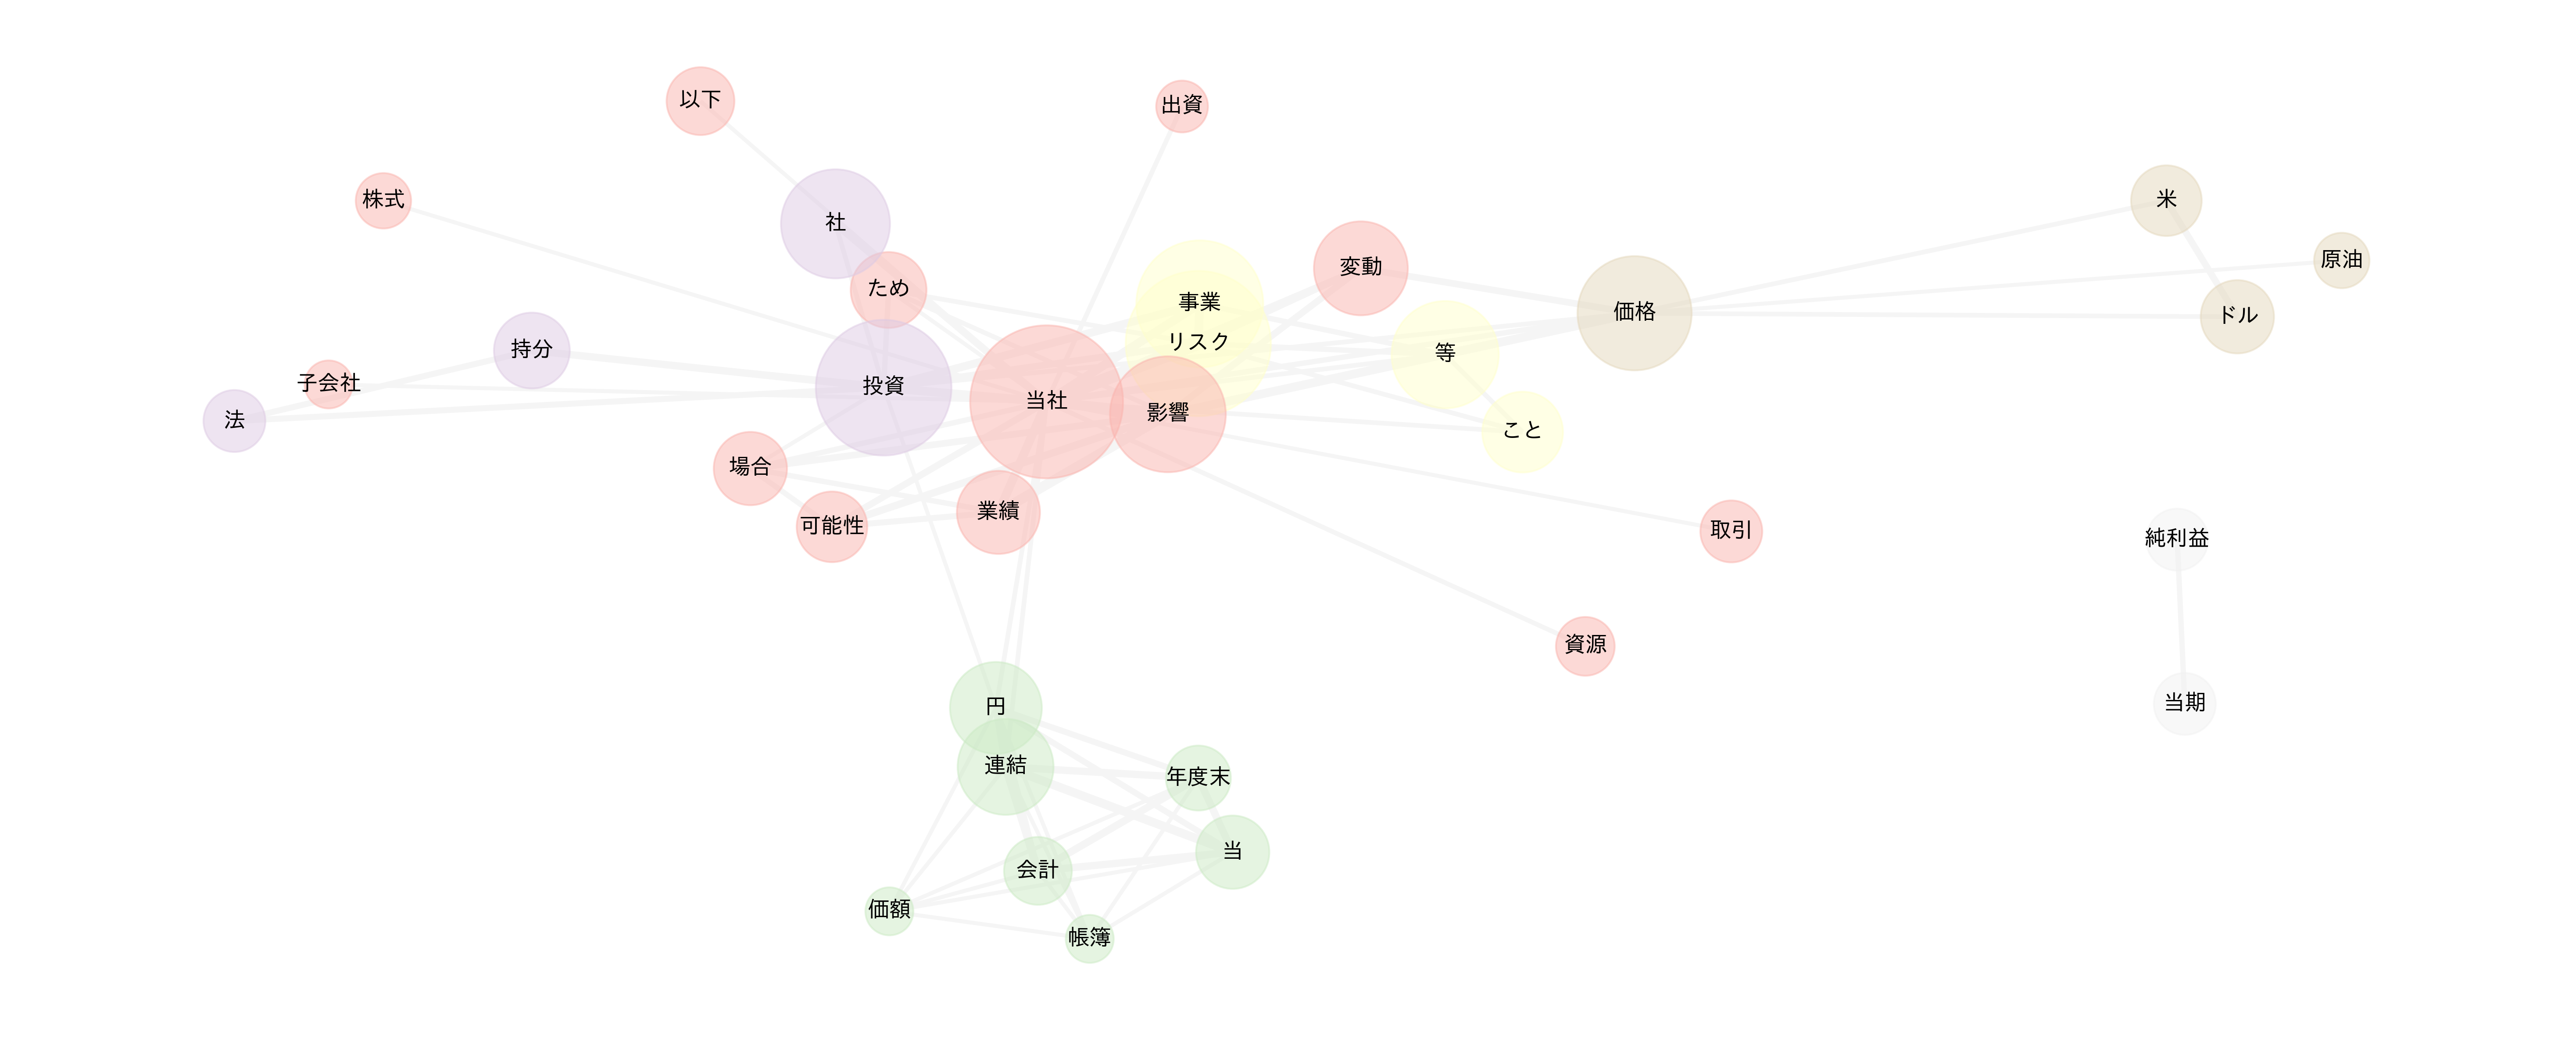

In [17]:
# ネットワークの生成
G = create_network(words, word_counts, Xc, weight_cutoff)

# 静的ネットワークの描画
pyplot_network(G)

    このコードは、共起ネットワークを生成し、静的なネットワーク図を描画するためのものです。以下に各行の詳細を示します。

    ネットワークの生成:
    G = create_network(words, word_counts, Xc, weight_cutoff)
    create_network 関数が呼び出されて、単語リスト (words)、単語の出現回数 (word_counts)、共起行列 (Xc)、および重みの閾値 (weight_cutoff) を用いて、共起ネットワークを生成しています。

    静的ネットワークの描画:
    pyplot_network(G)
    pyplot_network 関数が呼び出されて、生成されたネットワーク G を静的なネットワーク図として描画します。

    このコードを実行することで、指定された重みの閾値に基づいて共起ネットワークが生成され、それが可視化されます。
    可視化の結果は、ネットワークの構造や重要な単語の関係性を把握するのに役立つでしょう。

## version when submitted

In [18]:
!pip install watermark

In [19]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Mon Jan 29 2024

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

re                 : 2.2.1
japanize_matplotlib: 1.1.3
spacy              : 2.3.9
numpy              : 1.23.5
networkx           : 3.2.1
matplotlib         : 3.7.1
pandas             : 1.5.3

Watermark: 2.4.3



## 自然言語を真面目に勉強するなら
https://monachanpapa-scripting.com/python-about-shizengengoshori/

https://monachanpapa-scripting.com/python-keitaisokaiseki/

https://monachanpapa-scripting.com/python-keitaisokaiseki-kawabatayasunari-yukiguni/

https://monachanpapa-scripting.com/python-mecab-dictionary-custom/

https://monachanpapa-scripting.com/python-mecab-dictionary-custom/

https://monachanpapa-scripting.com/python-networkx/

https://monachanpapa-scripting.com/python-ngram/

https://monachanpapa-scripting.com/marukofu-python/



## 参考
https://zenn.dev/robes/articles/a3e1a6e80efd99

https://qiita.com/y-s-y-s/items/c567117f0cf2be8c0acb

https://note.com/nymnkun/n/n8abaa21d9e88

https://qiita.com/hanon52_/items/a2000da2f70d6c14ca5b

https://minamolab.com/khcoder-python-co-occurrence-network-analysis

https://blog.since2020.jp/data_analysis/nlplot_questionnaire/

https://tkstock.site/2022/08/24/python-googlecolab-networkx-matplotlib-japanese-networkx-plot/